<a href="https://colab.research.google.com/github/rachidboukhoudmi/Chest_x-ray_using_CNN.ipynb/blob/main/Chest_x_ray_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 72 bytes


In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [00:38<00:00, 43.3MB/s]
100% 2.29G/2.29G [00:38<00:00, 63.6MB/s]


In [ ]:
from zipfile import ZipFile

file_name = "/content/chest-xray-pneumonia.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
# importing libraries

import tensorflow.keras
from tensorflow.keras.layers import Input , Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import metrics
from matplotlib import pyplot as plt

In [ ]:
# Create path

train_loc = "/content/chest_xray/train"
test_loc = "/content/chest_xray/test"


In [ ]:
# resize image

trdata = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

traindata = trdata.flow_from_directory(
    directory = train_loc,
    target_size = (224,224),
)

tsdata = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

testdata = tsdata.flow_from_directory(
    directory = test_loc,
    target_size = (224,224),
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
traindata.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

# Define input image
input_shape = (224, 224, 3)

# Input Layer
img_input = Input(shape=input_shape, name='img_input')

# Build the Model
X = Conv2D(32, (3, 3), padding='same', activation='relu', name='layer_1', kernel_regularizer=regularizers.l2(0.001))(img_input)
X = Conv2D(64, (3, 3), padding='same', activation='relu', name='layer_2', kernel_regularizer=regularizers.l2(0.001))(X)
X = MaxPooling2D((2, 2), strides=(2, 2), name='layer_3')(X)
X = Dropout(0.25)(X)

X = Conv2D(64, (3, 3), padding='same', activation='relu', name='layer_4', kernel_regularizer=regularizers.l2(0.001))(X)
X = MaxPooling2D((2, 2), strides=(2, 2), name='layer_5')(X)
X = Dropout(0.25)(X)

X = Conv2D(128, (3, 3), padding='same', activation='relu', name='layer_6', kernel_regularizer=regularizers.l2(0.001))(X)
X = MaxPooling2D((2, 2), strides=(2, 2), name='layer_7')(X)
X = Dropout(0.25)(X)

X = Flatten(name='fc_1')(X)
X = Dense(64, name='layer_8')(X)
X = Dropout(0.5)(X)
X = Dense(2, activation='sigmoid', name='Predictions')(X)



In [ ]:
# Generate Model
from tensorflow.keras import Model

model = Model(inputs = img_input , outputs = X , name = "Binary_Classifaction")

In [ ]:
model.summary()

Model: "Binary_Classifaction"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ img_input (InputLayer)               │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_1 (Conv2D)                     │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_2 (Conv2D)                     │ (None, 224, 224, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_3 (MaxPooling2D)               │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_4 (Conv2D)                     │ (None, 112, 112, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_5 (MaxPooling2D)               │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_6 (Conv2D)                     │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_7 (MaxPooling2D)               │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_1 (Flatten)                       │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_8 (Dense)                      │ (None, 64)                  │       6,422,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Predictions (Dense)                  │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,552,898 (25.00 MB)

 Trainable params: 6,552,898 (25.00 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Start Train/Test

batch_size = 256
hist = model.fit( traindata , steps_per_epoch = traindata.samples//batch_size ,
                  validation_data = testdata ,
                  validation_steps = testdata.samples//batch_size ,
                  epochs = 10
                  )

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 39s 885ms/step - accuracy: 0.7689 - loss: 1.3111 - val_accuracy: 0.6562 - val_loss: 0.8205
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 651ms/step - accuracy: 0.7640 - loss: 0.7365 - val_accuracy: 0.5781 - val_loss: 0.7897
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 634ms/step - accuracy: 0.7373 - loss: 0.6688 - val_accuracy: 0.5781 - val_loss: 0.7426
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 690ms/step - accuracy: 0.7925 - loss: 0.5724 - val_accuracy: 0.7344 - val_loss: 0.7124
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 636ms/step - accuracy: 0.8075 - loss: 0.5261 - val_accuracy: 0.7969 - val_loss: 0.5054
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 626ms/step - accuracy: 0.8385 - loss: 0.4751 - val_accuracy: 0.7344 - val_loss: 0.5612
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 623ms/step - accuracy: 0.8749 - loss: 0.4194 - val_accuracy: 0.5781 - val_loss: 0.7464
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 534ms/step - accuracy: 0.8888 - loss: 0.3818 - val_accuracy: 0.765

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9086 - loss: 0.3157 - val_accuracy: 0.7812 - val_loss: 0.5139
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 720ms/step - accuracy: 0.9120 - loss: 0.3334 - val_accuracy: 0.8125 - val_loss: 0.4888


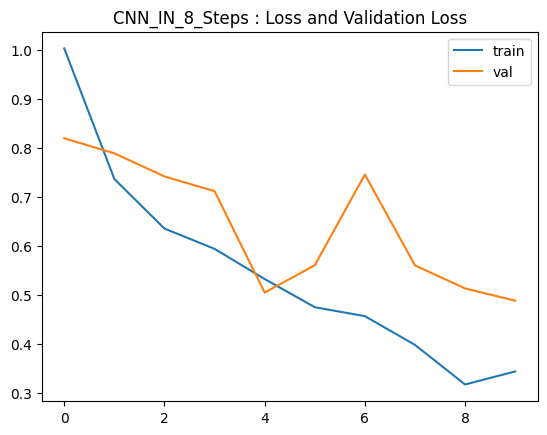

In [ ]:
plt.plot(hist.history['loss'] , label = 'train')
plt.plot(hist.history['val_loss'] , label = 'val')
plt.title("CNN_IN_8_Steps : Loss and Validation Loss")
plt.legend()
plt.show()


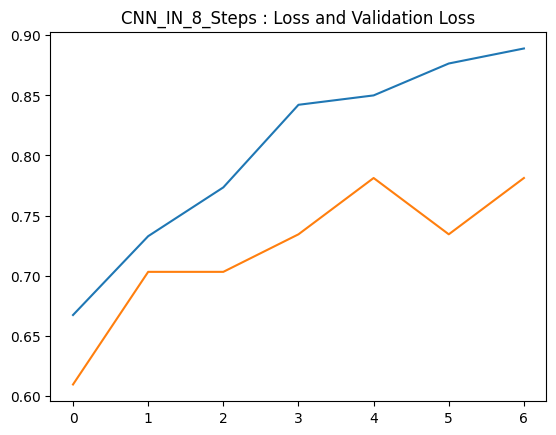

In [ ]:
plt.plot(hist.history['accuracy'] , label = 'train')
plt.plot(hist.history['val_accuracy'] , label = 'val')
plt.title("CNN_IN_8_Steps : Loss and Validation Loss")
plt.show()